# 2. Training Machine Learning Algorithms for Classification

In [114]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [105]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    errors_ : list
    Number of misclassifications in every epoch.
    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y, is_print=False):
        self.w_hist = np.zeros((len(y)*self.n_iter+1, 1+X.shape[1]), dtype=float)
        self.w_ = np.zeros(1 + X.shape[1])
        self.w_hist[0] = self.w_
        self.errors_ = []
        for _ in range(self.n_iter):
            if is_print:
                print(_+1, "th loop!")
                print(self.w_)
            errors = 0
            for i, (xi, target) in enumerate(zip(X, y)):
                y_hat = self.predict(xi)
                update = self.eta * (target - y_hat)
                self.w_[1:] += update * xi
                self.w_[0] += update
                if is_print:
                    print("w: ", self.w_, ", xi: ", xi, ", y_true", target,", y_hat: ", y_hat)
                self.w_hist[_*len(y)+i+1] = np.copy(self.w_)
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Use Iris Dataset

In [96]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [97]:
df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Plot Scatter

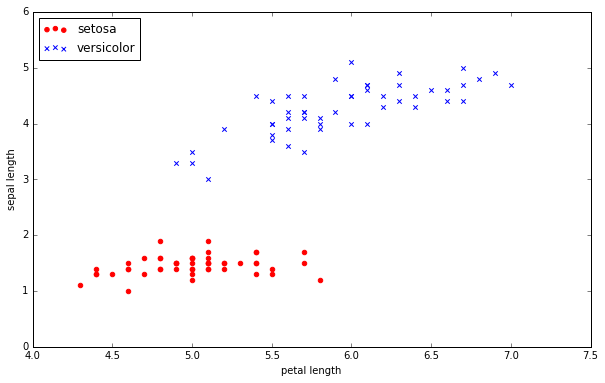

In [101]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

fig, axes = plt.subplots(figsize=(10, 6))
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

## Weight Change

In [69]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y, is_print=True)

1 th loop!
[ 0.  0.  0.]
w:  [-0.2  -1.02 -0.28] , xi:  [ 5.1  1.4] , y_true -1 , y_hat:  1
w:  [-0.2  -1.02 -0.28] , xi:  [ 4.9  1.4] , y_true -1 , y_hat:  -1
w:  [-0.2  -1.02 -0.28] , xi:  [ 4.7  1.3] , y_true -1 , y_hat:  -1
w:  [-0.2  -1.02 -0.28] , xi:  [ 4.6  1.5] , y_true -1 , y_hat:  -1
w:  [-0.2  -1.02 -0.28] , xi:  [ 5.   1.4] , y_true -1 , y_hat:  -1
w:  [-0.2  -1.02 -0.28] , xi:  [ 5.4  1.7] , y_true -1 , y_hat:  -1
w:  [-0.2  -1.02 -0.28] , xi:  [ 4.6  1.4] , y_true -1 , y_hat:  -1
w:  [-0.2  -1.02 -0.28] , xi:  [ 5.   1.5] , y_true -1 , y_hat:  -1
w:  [-0.2  -1.02 -0.28] , xi:  [ 4.4  1.4] , y_true -1 , y_hat:  -1
w:  [-0.2  -1.02 -0.28] , xi:  [ 4.9  1.5] , y_true -1 , y_hat:  -1
w:  [-0.2  -1.02 -0.28] , xi:  [ 5.4  1.5] , y_true -1 , y_hat:  -1
w:  [-0.2  -1.02 -0.28] , xi:  [ 4.8  1.6] , y_true -1 , y_hat:  -1
w:  [-0.2  -1.02 -0.28] , xi:  [ 4.8  1.4] , y_true -1 , y_hat:  -1
w:  [-0.2  -1.02 -0.28] , xi:  [ 4.3  1.1] , y_true -1 , y_hat:  -1
w:  [-0.2  -1.02 -0.28] 

## Weight Update Times in each loop

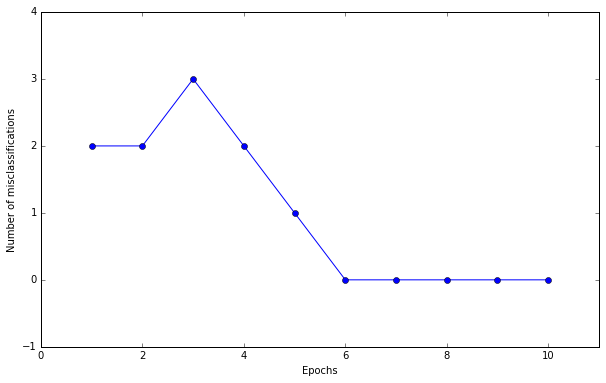

In [100]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y, is_print=False)

fig, axes = plt.subplots(figsize=(10, 6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.xlim(0, 11)
plt.ylim(-1, 4)
plt.show()

## Plot updating separating line

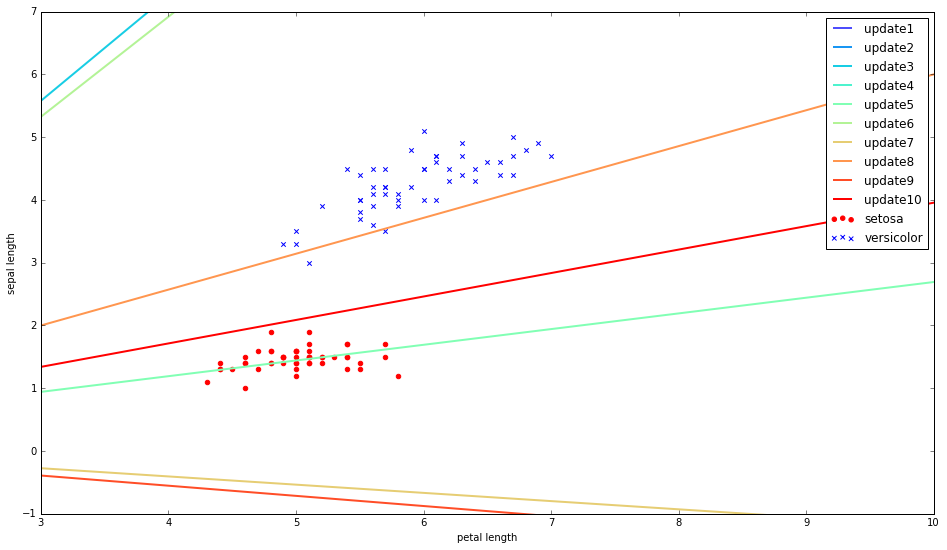

In [133]:
n_iter = 10
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [0, 2]].values

fig, axes = plt.subplots(figsize=(16, 9))
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

ppn = Perceptron(eta=0.1, n_iter=n_iter)
ppn.fit(X, y, is_print=False)

x1_list = np.linspace(3, 10, 100)

w = ppn.w_hist[0]
update_count = 0
for t in range(n_iter):
    for n in range(len(y)):
        if not np.array_equal(w, ppn.w_hist[t*len(y)+n+1]):
            update_count += 1
            w = ppn.w_hist[t*len(y)+n+1]
            plt.plot(x1_list, -1*x1_list*w[1]/w[2] - w[0]/w[2], linewidth=2,
                     color=cm.rainbow(update_count/10), label="update{}".format(update_count))
        
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.xlim(3, 10)
plt.ylim(-1, 7)
plt.legend()
plt.show()

## Plot separating line

In [103]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

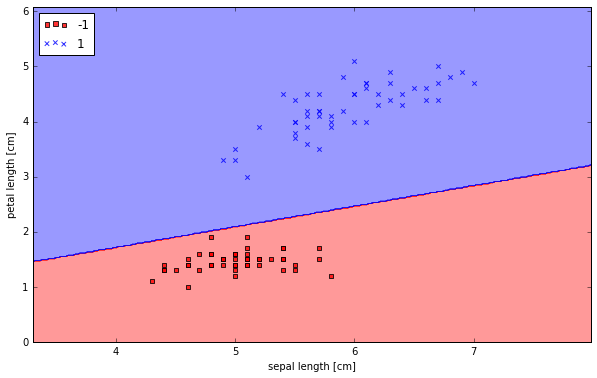

In [104]:
fig, axes = plt.subplots(figsize=(10, 6))
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()